In [4]:
import os
import numpy as np
import pandas as pd
from scipy.interpolate import  interp1d

import pyradi.ryplot as ryplot
import pyradi.rymodtran as rymodtran
import pyradi.ryutils as ryutils

These runs were made with the desert albedo in the modtran albedo file replaced with the data in this folder.

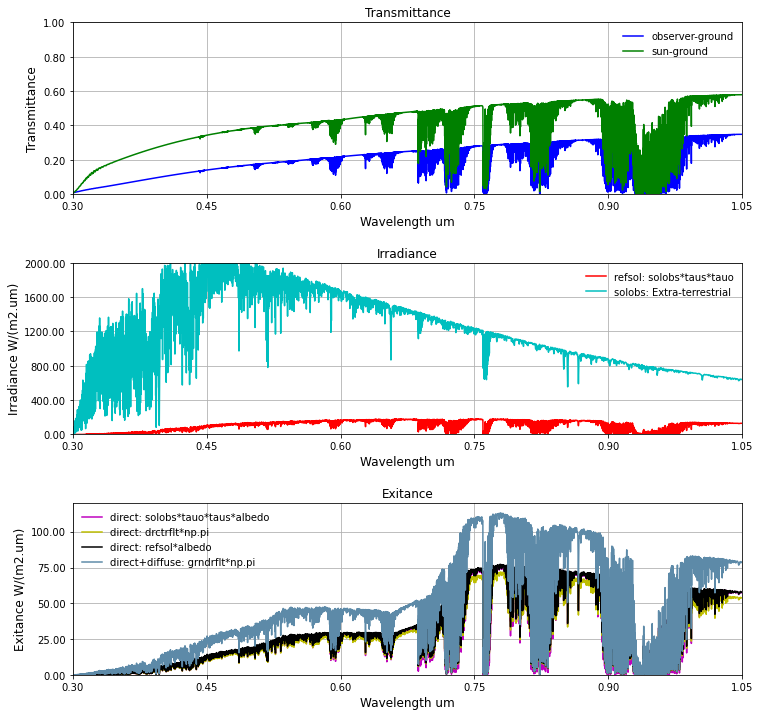

In [5]:
tape7 = rymodtran.loadtape7('modobserver/tape7', ['FREQ', 'REF_SOL','DEPTH','SOL@OBS','GRND_RFLT','DRCT_RFLT'] )
tape7s = rymodtran.loadtape7('modsun/tape7s', ['FREQ', 'REF_SOL','DEPTH','SOL@OBS','GRND_RFLT','DRCT_RFLT'] )
albedod = np.loadtxt('albedo.dat')

waven = tape7[:,0]

# transmittance observer to ground
tauo = np.exp(-tape7[:,2])
tauo = tauo.reshape(-1,1)
# transmittance sun to ground
taus = np.exp(-tape7s[:,2])
taus = taus.reshape(-1,1)


# TSNREF: sun-final_altitude sensor solar irradiance [real]
# W/m2.cm-1
refsoln = tape7[:,1]*1e4
solobsn = tape7[:,3]*1e4
grndrfltn = tape7[:,4]*1e4
drctrfltn = tape7[:,5]*1e4


# convert to microns
(wavel, refsol) = ryutils.convertSpectralDensity(waven, refsoln, 'nl')
(wavel, solobs) = ryutils.convertSpectralDensity(waven, solobsn, 'nl')
(wavel, grndrflt) = ryutils.convertSpectralDensity(waven, grndrfltn, 'nl')
(wavel, drctrflt) = ryutils.convertSpectralDensity(waven, drctrfltn, 'nl')

intfn = interp1d(albedod[:,0],albedod[:,1])
albedo = intfn(wavel).reshape(-1,1)

p = ryplot.Plotter(1, 3, 1, figsize=(12,12))

wllong  = 1
p.plot(1,wavel,tauo,label=['observer-ground'],pltaxis=[0.3,wllong,0,1])
p.plot(1,wavel,taus,'Transmittance','Wavelength um','Transmittance',
       label=['sun-ground'],pltaxis=[0.3,wllong,0,1])

p.plot(2,wavel,refsol,label=['refsol: solobs*taus*tauo'],pltaxis=[0.3,wllong,0,2000])
p.plot(2,wavel,solobs,'Irradiance','Wavelength um','Irradiance W/(m2.um)',
       label=['solobs: Extra-terrestrial'],pltaxis=[0.3,wllong,0,2000])

p.plot(3,wavel,solobs*tauo*taus*albedo,label=['direct: solobs*tauo*taus*albedo'],pltaxis=[0.3,wllong,0,120])
p.plot(3,wavel, drctrflt*np.pi,label=['direct: drctrflt*np.pi'],pltaxis=[0.3,wllong,0,120])
p.plot(3,wavel, refsol*albedo,label=['direct: refsol*albedo'],pltaxis=[0.3,wllong,0,120])
p.plot(3,wavel, grndrflt*np.pi,'Exitance','Wavelength um','Exitance W/(m2.um)',
       label=['direct+diffuse: grndrflt*np.pi'],pltaxis=[0.3,wllong,0,120]);

# p.saveFig(os.path.join(datadir,'{}.png'.format(scenario)))

